In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import librosa, librosa.display
import IPython.display as ipd
from scipy.io import wavfile
from librosa.feature import melspectrogram
from librosa.core import load as load_wav
from librosa import power_to_db
from librosa.display import specshow

from google.colab import drive
import pickle
import io
from tqdm import tqdm

In [28]:
dat1 = pd.DataFrame({'fname': ['1','2','3'], 'label': [0, 1, 0]})
dat1['wav'] = 0.0
dat1['wav'][0] = 1.0
dat1['wav'][2] = 2.0
dat1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,fname,label,wav
0,1,0,1.0
1,2,1,0.0
2,3,0,2.0


In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Загрузка данных
def loading_train_data():
  data = pd.read_csv('drive/My Drive/Audio analytics/data/train.csv', sep=',')
  data_wav = []
  print('\nTotal count: ', len(data.index))

  for filename in tqdm(data.fname):
    y, _ = librosa.load('drive/My Drive/Audio analytics/data/train/' + filename, sr=11025)
    data_wav.append(y)
  
  return data_wav, data.label

In [0]:
# Загрузка данных
def loading_test_data():
  data = pd.read_csv('drive/My Drive/Audio analytics/data/test.csv', sep=',')
  data_wav = []
  print('\nTotal count: ', len(data.index))

  for filename in tqdm(data.fname):
    y, _ = librosa.load('drive/My Drive/Audio analytics/data/test/' + filename, sr=11025)
    data_wav.append(y)
  
  return data_wav, data.label

In [0]:
# Составление словаря с индексами классов
def class_indices(y):
  dictionary = dict()
  for i in set(y):
    dictionary[i] = []
  
  for i, cl in enumerate(y):
    dictionary[cl].append(i)
  
  return dictionary

In [0]:
# Получение фич
def getting_features(data_wav, n, sr=11025, fft_size=1024, overlap=4, mels = 64):
  hop = fft_size // overlap
  features = []
  for y in tqdm(data_wav):
    #data_chroma.append(librosa.feature.chroma_stft(y, sr))
    mel_spec = melspectrogram(y, n_fft=fft_size, hop_length=hop, n_mels=mels, fmax=sr // 2)
    log_mel_spec = power_to_db(mel_spec, ref=np.max)
    features.append(log_mel_spec)

  return features

In [0]:
# Разделение данных на train, test
def train_test(data_chroma, dict_labels, test_size=0.2):
  X_train = []
  y_train = []
  X_test = []
  y_test = []
  
  for keys, values in dict_labels.items():
    n = len(values)
    train_size = int(n*(1-test_size))
    
    for i in range(train_size):
      X_train.append(data_chroma[values[i]])
      y_train.append(keys)
    
    for i in range(train_size, n):
      X_test.append(data_chroma[values[i]])
      y_test.append(keys)

  return X_train, y_train, X_test, y_test

In [0]:
# Сохранение в формате pkl
def save_data(X_train, y_train, X_test, y_test):
  pickle.dump(X_train, open('drive/My Drive/Audio analytics/pickle/X_train_log_mel.pkl', 'wb'))
  pickle.dump(y_train, open('drive/My Drive/Audio analytics/pickle/y_train_log_mel.pkl', 'wb'))
  pickle.dump(X_test, open('drive/My Drive/Audio analytics/pickle/X_test_log_mel.pkl', 'wb'))
  pickle.dump(y_test, open('drive/My Drive/Audio analytics/pickle/y_test_log_mel.pkl', 'wb'))

In [0]:
def plot_spectrogramm(log_mel, wav, label, sr):
  
  plt.figure(figsize=(15, 5))
  librosa.display.waveplot(wav, sr, alpha=0.8)
  print(label)
  
  plt.figure(figsize=(10, 4))
  specshow(log_mel, y_axis='mel', fmax=sr//2, x_axis='time', cmap='viridis')
  plt.colorbar(format='%+2.0f дБ')
  plt.title('Логарифм мелспектрограммы')
  plt.tight_layout()
  plt.show()

In [0]:
X_train, y_train = loading_train_data()

  0%|          | 0/5683 [00:00<?, ?it/s]


Total count:  5683


100%|██████████| 5683/5683 [1:02:20<00:00,  1.52it/s]


In [0]:
X_test, y_test = loading_test_data()

  0%|          | 0/3790 [00:00<?, ?it/s]


Total count:  3790


100%|██████████| 3790/3790 [1:13:19<00:00,  1.16s/it]


In [0]:
n_train = len(X_train)
n_test = len(X_test)
print('Length train set:', n_train)
print('Length test set:', n_test)

Length train set: 5683
Length test set: 3790


In [0]:
indices = class_indices(y_train)

In [0]:
train_features = getting_features(X_train, n_train)

100%|██████████| 5683/5683 [01:32<00:00, 61.44it/s]


In [0]:
test_features = getting_features(X_test, n_test)

100%|██████████| 3790/3790 [01:01<00:00, 61.39it/s]


0.0


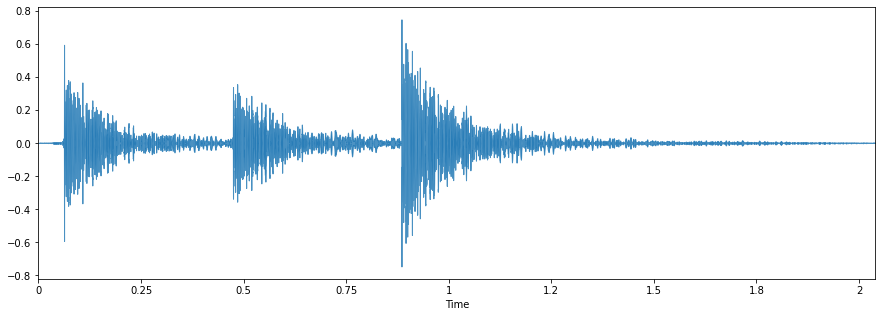

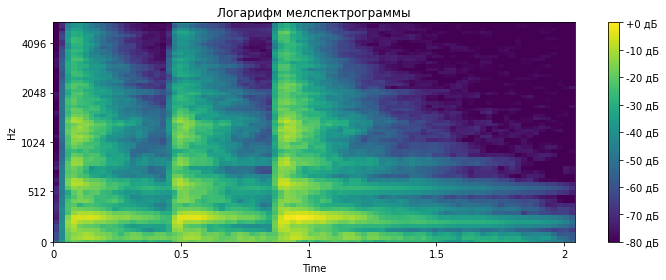

In [0]:
plot_spectrogramm(test_features[0], X_test[0], y_test[0], 11025)
ipd.Audio(X_test[0], rate=11025)

In [0]:
X_train, y_train, X_test, y_test = train_test(train_features, indices)

In [0]:
save_data(train_features, y_train, test_features, y_test)